In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("airfoil_self_noise.csv")

### EXPLORATORY ANALYSIS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Frequency     1503 non-null   int64  
 1   Angle         1503 non-null   float64
 2   Chord_Length  1503 non-null   float64
 3   F_S_Velocity  1503 non-null   float64
 4   Suction       1503 non-null   float64
 5   Pressure      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [5]:
data.shape

(1503, 6)

In [6]:
data.describe()

,Frequency,Angle,Chord_Length,F_S_Velocity,Suction,Pressure
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [7]:
(200 - 200) / (20000 - 200)

0.0

In [8]:

(20000 - 2886.3806) / (3152)

5.429447779187817

<AxesSubplot:xlabel='Frequency', ylabel='Pressure'>

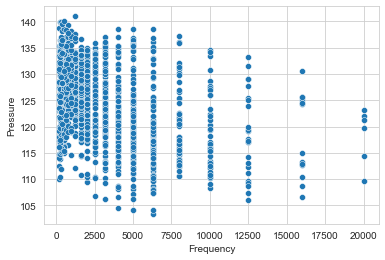

In [9]:
sns.scatterplot(x=data["Frequency"], y = data["Pressure"])

C:\Users\KING TOMI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

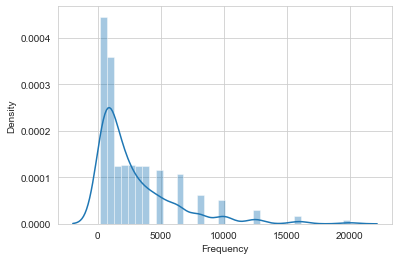

In [10]:
sns.distplot(data["Frequency"])

C:\Users\KING TOMI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='F_S_Velocity', ylabel='Density'>

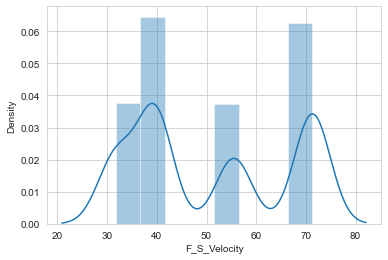

In [11]:
sns.distplot(data["F_S_Velocity"])

In [12]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [14]:
data_min_max = data.copy()
data_standard = data.copy()

In [15]:
X = data.drop(["Pressure"], axis=1)
Y = data["Pressure"]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [16]:
X_train.shape

(1052, 5)

In [17]:
rf = RandomForestRegressor(n_estimators=500, random_state=42)

In [18]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [19]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [20]:
pred = rf.predict(X_test)

In [21]:
errors = []
squared_errors = []
for i, item in enumerate(y_test):
    error = pred[i] - item
    sq_error  = abs(error) ** 2
    errors.append(error)
    squared_errors.append(sq_error)

In [22]:
np.mean(errors)

0.14508832372504848

In [23]:
np.mean(squared_errors)

3.418355964822901

In [24]:
min_max = MinMaxScaler()
sc = StandardScaler()

In [25]:
X_m = data_min_max.drop(["Pressure"], axis=1)
Y_m = data_min_max["Pressure"]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, Y_m, test_size=0.3, random_state=42)

In [26]:
X_train_m_m = min_max.fit_transform(X_train_m)
X_test_m_m = min_max.transform(X_test_m)

In [28]:
from joblib import dump

In [29]:
dump(rf,"rf_nodel.joblib")

['rf_nodel.joblib']